In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#setups
%matplotlib inline

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)

In [2]:
#Matplotlib setups
from matplotlib.ticker import FuncFormatter

In [3]:
#more Matplotlib setups
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [4]:
#more Matplotlib setups

plt.rcdefaults()
plt.rcParams.update({
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
})

In [5]:
#update your Matplotlib styling
#this will apply to all your graphs if you do not change params when creating each different chart

# plt.rcParams.update({
#     'axes.facecolor': 'floralwhite',
#     'savefig.facecolor': 'floralwhite',
#     'figure.facecolor': 'floralwhite',
#     'axes.spines.left': True,
#     'axes.spines.bottom': True,
#     'axes.spines.top': False,
#     'axes.spines.right': False,
#     'axes.grid':True, 
#     'grid.color':'#54555A',
#     'grid.linewidth':.3,
#     'grid.alpha':.2,
#     'xtick.top': False,
#     'xtick.bottom': True,
#     'xtick.color': '#54555A',
#     'ytick.color':'#54555A',
#     'xtick.major.size': .3,
#     'xtick.major.width': .3,
#     'xtick.major.pad': 10,
#     'xtick.direction': 'in',
#     'xtick.labelsize': 'medium',
#     'legend.loc': 'best',
#     'legend.frameon': False,
#     'legend.columnspacing': 2.0,
#     'font.family': 'Calibri',
#     'font.size':12,
#     'text.color':'black',
#     'axes.titlesize': 14,
#     'axes.labelsize': 10,
#     'xtick.labelsize': 8,
#     'ytick.labelsize': 8
#      })

In [6]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 1984
groups1984 = pd.read_csv('groups_84.csv', sep=';')
groups1984 = groups1984[groups1984.LANGUAGE_ID.str.contains('EL')]
groups1984 = groups1984.rename(columns={'ID':'GROUP_ID'})
groups1984

,GROUP_ID,LANGUAGE_ID,ACRONYM,LABEL
6,GP0201,EL,S,Σοσιαλιστική Ομάδα
30,GP0202,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...
54,GP0203,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών
78,GP0204,EL,COM,Κομμουνιστική ομάδα και Προσκείμενοι
102,GP0205,EL,L,Φιλελεύθερη και Δημοκρατική Ομάδα
126,GP0206,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών
150,GP0207,EL,ARC,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...
174,GP0208,EL,DR,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς
198,NaN,EL,NI,Μη Εγγεγραμμένοι


In [7]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 1984
parties1984 = pd.read_csv('parties_84.csv', sep=';')
parties1984 = parties1984[['DIVISION_ID','ID','ACRONYM']].copy()
parties1984 = parties1984[parties1984.DIVISION_ID.str.contains('EL')]
parties1984 = parties1984.rename(columns={'ID':'PARTY_ID'})
parties1984

,DIVISION_ID,PARTY_ID,ACRONYM
37,EL,EL01,PASOK
38,EL,EL02,ND
39,EL,EL03,KKE
40,EL,EL04,E.P.EN
41,EL,EL90,Other parties


In [8]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada1984 = pd.read_csv('el_84.csv', sep=';')
omada1984 = omada1984[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()
omada1984

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0201,10,2.3
1,GP0202,9,2.1
2,GP0203,0,0.0
3,GP0204,4,0.9
4,GP0205,0,0.0
5,GP0206,0,0.0
6,GP0207,0,0.0
7,GP0208,1,0.2
8,NaN,0,0.0


In [9]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu1984 = pd.read_csv('eu_84.csv', sep=';')
eu1984 = eu1984[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]
eu1984

,GROUP_ID,SEATS_TOTAL,SEATS_PERCENT_EU
0,GP0201,130,29.9
1,GP0202,110,25.4
2,GP0203,50,11.5
3,GP0204,41,9.4
4,GP0205,31,7.1
5,GP0206,29,6.7
6,GP0207,20,4.6
7,GP0208,16,3.7
8,NaN,7,1.6


In [10]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh1984 = pd.read_csv('katataksh_84.csv', sep=';')
katataksh1984 = katataksh1984[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()
katataksh1984

,PARTY_ID,SEATS_TOTAL,GROUP_ID
0,EL01,10,GP0201
1,EL02,9,GP0202
2,EL03,4,GP0204
3,EL04,1,GP0208


In [11]:
#Ξεκινάμε να εν΄΄ωνουμε τα dataframe μας με βάση κοινές στήλες
#Πρώτα με το GROUP_ID, που είναι οι πολιτικές ομάδες του Ευρωκοινοβουλίου
df1984 = pd.merge(katataksh1984, omada1984, on='GROUP_ID', how='outer')
df1984

,PARTY_ID,SEATS_TOTAL_x,GROUP_ID,SEATS_TOTAL_y,SEATS_PERCENT_EU
0,EL01,10.0,GP0201,10,2.3
1,EL02,9.0,GP0202,9,2.1
2,EL03,4.0,GP0204,4,0.9
3,EL04,1.0,GP0208,1,0.2
4,NaN,NaN,GP0203,0,0.0
5,NaN,NaN,GP0205,0,0.0
6,NaN,NaN,GP0206,0,0.0
7,NaN,NaN,GP0207,0,0.0
8,NaN,NaN,NaN,0,0.0


In [12]:
df1984 = pd.merge(df1984, groups1984, on='GROUP_ID', how='outer')
df1984

,PARTY_ID,SEATS_TOTAL_x,GROUP_ID,SEATS_TOTAL_y,SEATS_PERCENT_EU,LANGUAGE_ID,ACRONYM,LABEL
0,EL01,10.0,GP0201,10,2.3,EL,S,Σοσιαλιστική Ομάδα
1,EL02,9.0,GP0202,9,2.1,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...
2,EL03,4.0,GP0204,4,0.9,EL,COM,Κομμουνιστική ομάδα και Προσκείμενοι
3,EL04,1.0,GP0208,1,0.2,EL,DR,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς
4,NaN,NaN,GP0203,0,0.0,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών
5,NaN,NaN,GP0205,0,0.0,EL,L,Φιλελεύθερη και Δημοκρατική Ομάδα
6,NaN,NaN,GP0206,0,0.0,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών
7,NaN,NaN,GP0207,0,0.0,EL,ARC,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...
8,NaN,NaN,NaN,0,0.0,EL,NI,Μη Εγγεγραμμένοι


In [13]:
#Στη συνέχεια με το PARTY_ID, που είναι τα εθνικά κόμματα της Ελλάδας
df1984 = pd.merge(df1984, parties1984, on='PARTY_ID', how='outer')
df1984

,PARTY_ID,SEATS_TOTAL_x,GROUP_ID,SEATS_TOTAL_y,SEATS_PERCENT_EU,LANGUAGE_ID,ACRONYM_x,LABEL,DIVISION_ID,ACRONYM_y
0,EL01,10.0,GP0201,10.0,2.3,EL,S,Σοσιαλιστική Ομάδα,EL,PASOK
1,EL02,9.0,GP0202,9.0,2.1,EL,PPE,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,EL,ND
2,EL03,4.0,GP0204,4.0,0.9,EL,COM,Κομμουνιστική ομάδα και Προσκείμενοι,EL,KKE
3,EL04,1.0,GP0208,1.0,0.2,EL,DR,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,EL,E.P.EN
4,NaN,NaN,GP0203,0.0,0.0,EL,ED,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,NaN
5,NaN,NaN,GP0205,0.0,0.0,EL,L,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,NaN
6,NaN,NaN,GP0206,0.0,0.0,EL,RDE,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,NaN
7,NaN,NaN,GP0207,0.0,0.0,EL,ARC,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,NaN
8,NaN,NaN,NaN,0.0,0.0,EL,NI,Μη Εγγεγραμμένοι,NaN,NaN
9,EL90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EL,Other parties


In [14]:
#Στη συνέχεια μετονομάζουμε κάποιες στήλες ώστε να ξεχωρίζουμε τις θέσεις των εθνικών κομμάτων (SEATS_TOTAL_P από το Party)
#και τις θέσεις των πολιτικών ομάδων (SEATS_TOTAL_G από το Groups)
df1984 = df1984[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df1984 = df1984.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df1984 = df1984.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df1984['YEAR'] = 1984
df1984

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,10.0,GP0201,10.0,2.3,Σοσιαλιστική Ομάδα,PASOK,1984
1,EL02,9.0,GP0202,9.0,2.1,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984
2,EL03,4.0,GP0204,4.0,0.9,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984
3,EL04,1.0,GP0208,1.0,0.2,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984
4,NaN,NaN,GP0203,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984
5,NaN,NaN,GP0205,0.0,0.0,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984
6,NaN,NaN,GP0206,0.0,0.0,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984
7,NaN,NaN,GP0207,0.0,0.0,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,1984
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,1984


In [15]:
df1984 = pd.merge(df1984, eu1984, on='GROUP_ID', how='outer')
df1984

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,10.0,GP0201,10.0,2.3,Σοσιαλιστική Ομάδα,PASOK,1984,130,29.9
1,EL02,9.0,GP0202,9.0,2.1,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984,110,25.4
2,EL03,4.0,GP0204,4.0,0.9,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984,41,9.4
3,EL04,1.0,GP0208,1.0,0.2,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984,16,3.7
4,NaN,NaN,GP0203,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984,50,11.5
5,NaN,NaN,GP0205,0.0,0.0,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984,31,7.1
6,NaN,NaN,GP0206,0.0,0.0,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984,29,6.7
7,NaN,NaN,GP0207,0.0,0.0,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984,20,4.6
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,1984,7,1.6
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,1984,7,1.6


In [16]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 1989
groups1989 = pd.read_csv('groups_89.csv', sep=';')
groups1989 = groups1989[groups1989.LANGUAGE_ID.str.contains('EL')]
groups1989 = groups1989.rename(columns={'ID':'GROUP_ID'})

In [17]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 1989
parties1989 = pd.read_csv('parties_89.csv', sep=';')
parties1989 = parties1989[['DIVISION_ID','ID','ACRONYM']].copy()
parties1989 = parties1989[parties1989.DIVISION_ID.str.contains('EL')]
parties1989 = parties1989.rename(columns={'ID':'PARTY_ID'})

In [18]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada1989 = pd.read_csv('el_89.csv', sep=';')
omada1989 = omada1989[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [19]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu1989 = pd.read_csv('eu_89.csv', sep=';')
eu1989 = eu1989[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [20]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh1989 = pd.read_csv('katataksh_89.csv', sep=';')
katataksh1989 = katataksh1989[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [21]:
#Ακολουθούμε την ίδια διαδικασία για όλες τις χρονιές

In [22]:
df1989 = pd.merge(katataksh1989, omada1989, on='GROUP_ID', how='outer')
df1989 = pd.merge(df1989, groups1989, on='GROUP_ID', how='outer')
df1989 = pd.merge(df1989, parties1989, on='PARTY_ID', how='outer')

In [23]:
df1989 = df1989[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df1989 = df1989.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df1989 = df1989.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df1989['YEAR'] = 1989
df1989

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU,LABEL,ACRONYM_y,YEAR
0,EL01,9.0,GP0401,9.0,1.7,Σοσιαλιστική Ομάδα,PA.SO.K.,1989
1,EL02,10.0,GP0402,10.0,1.9,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1989
2,EL03,1.0,GP0406,1.0,0.2,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,1989
3,EL03,3.0,GP0409,3.0,0.6,Συνασπισμός της Αριστεράς,SYN,1989
4,EL04,1.0,GP0407,1.0,0.2,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,1989
5,NaN,NaN,GP0403,0.0,0.0,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο...",NaN,1989
6,NaN,NaN,GP0404,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1989
7,NaN,NaN,GP0405,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989
8,NaN,NaN,GP0408,0.0,0.0,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...,NaN,1989
9,NaN,NaN,GP0410,0.0,0.0,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989


In [24]:
df1989 = pd.merge(df1989, eu1989, on='GROUP_ID', how='outer')
df1989

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,9.0,GP0401,9.0,1.7,Σοσιαλιστική Ομάδα,PA.SO.K.,1989,180,34.8
1,EL02,10.0,GP0402,10.0,1.9,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1989,121,23.4
2,EL03,1.0,GP0406,1.0,0.2,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,1989,28,5.4
3,EL03,3.0,GP0409,3.0,0.6,Συνασπισμός της Αριστεράς,SYN,1989,14,2.7
4,EL04,1.0,GP0407,1.0,0.2,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,1989,20,3.9
5,NaN,NaN,GP0403,0.0,0.0,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο...",NaN,1989,49,9.5
6,NaN,NaN,GP0404,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1989,34,6.6
7,NaN,NaN,GP0405,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989,30,5.8
8,NaN,NaN,GP0408,0.0,0.0,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...,NaN,1989,17,3.3
9,NaN,NaN,GP0410,0.0,0.0,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989,13,2.5


In [25]:
df1989 = df1989.sort_values(by='SEATS_TOTAL_G',ascending=False)
df1989.head()

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
1,EL02,10.0,GP0402,10.0,1.9,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1989,121,23.4
0,EL01,9.0,GP0401,9.0,1.7,Σοσιαλιστική Ομάδα,PA.SO.K.,1989,180,34.8
3,EL03,3.0,GP0409,3.0,0.6,Συνασπισμός της Αριστεράς,SYN,1989,14,2.7
2,EL03,1.0,GP0406,1.0,0.2,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,1989,28,5.4
4,EL04,1.0,GP0407,1.0,0.2,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,1989,20,3.9


In [26]:
df1989.shape

(12, 10)

In [27]:
#Επειδή τα αρχεία δεν παρουσιάζονται με αύξουσα σειρά καθώς η Ν.Δ. έχει πάρει τον κωδικό EL02 παρόλο που έχει τις 
#περισσότερες έδρες, θέλουμε να διορθώσουμε την κατάταξη. Επομένως:
#Δημιουργο΄ύμε μια λίστα για τα σωστά PARTY_IDs

numbers = range(1, 13)

#Ορίζουμε μια κενή λίστα
CLEANED_ID = []

#περνάμε από όλους τους αριθμούς μέσα στο dataset
for n in numbers:
    #για κάθε αριθμό, δημιουργούμε μια μεταβλητή που ονομάζεται i και η οποία θα αποτελεί τα γράμματα EL, που είναι ο κωδικός
    #για τα κόμματα, μαζί με τον εκάστοτε αριθμό n
    
    i = 'EL0'+str(n)
    #Γεμίζουμε την άδεια λίστα που φτιάξαμε στην αρχή με τα καινούρια IDs 
    
    CLEANED_ID.append(i)

#τυπώνουμε τη λίστα μας για να δούμε ότι όλα έχουν δουλέψει σωστά και ότι τα IDs βγαίνουν με τη σειρά
CLEANED_ID

['EL01',
 'EL02',
 'EL03',
 'EL04',
 'EL05',
 'EL06',
 'EL07',
 'EL08',
 'EL09',
 'EL010',
 'EL011',
 'EL012']

In [28]:
#Δημιουργούμε μια καινούρια στήλη με τα καινούρια IDs που φτιάξαμε
df1989['CLEANED_PARTY_ID'] = CLEANED_ID
df1989

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y,CLEANED_PARTY_ID
1,EL02,10.0,GP0402,10.0,1.9,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1989,121,23.4,EL01
0,EL01,9.0,GP0401,9.0,1.7,Σοσιαλιστική Ομάδα,PA.SO.K.,1989,180,34.8,EL02
3,EL03,3.0,GP0409,3.0,0.6,Συνασπισμός της Αριστεράς,SYN,1989,14,2.7,EL03
2,EL03,1.0,GP0406,1.0,0.2,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,1989,28,5.4,EL04
4,EL04,1.0,GP0407,1.0,0.2,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,1989,20,3.9,EL05
5,NaN,NaN,GP0403,0.0,0.0,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο...",NaN,1989,49,9.5,EL06
6,NaN,NaN,GP0404,0.0,0.0,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1989,34,6.6,EL07
7,NaN,NaN,GP0405,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989,30,5.8,EL08
8,NaN,NaN,GP0408,0.0,0.0,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...,NaN,1989,17,3.3,EL09
9,NaN,NaN,GP0410,0.0,0.0,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο,NaN,1989,13,2.5,EL010


In [29]:
df1989 = df1989[['SEATS_TOTAL_P','GROUP_ID','SEATS_TOTAL_G','SEATS_PERCENT_EU_x', 'SEATS_PERCENT_EU_y','LABEL', 'ACRONYM_y', 'CLEANED_PARTY_ID', 'YEAR']].copy()
#"Πετάμε" τα παλιά PARTY_IDs και μετονομάζουμε την στήλη με τα καινούρια, που θα τα αντικαταστήσει
df1989 = df1989.rename(columns={'CLEANED_PARTY_ID':'PARTY_ID'})
df1989

,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,SEATS_PERCENT_EU_y,LABEL,ACRONYM_y,PARTY_ID,YEAR
1,10.0,GP0402,10.0,1.9,23.4,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,EL01,1989
0,9.0,GP0401,9.0,1.7,34.8,Σοσιαλιστική Ομάδα,PA.SO.K.,EL02,1989
3,3.0,GP0409,3.0,0.6,2.7,Συνασπισμός της Αριστεράς,SYN,EL03,1989
2,1.0,GP0406,1.0,0.2,5.4,Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά,SYN,EL04,1989
4,1.0,GP0407,1.0,0.2,3.9,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,DI.ANA,EL05,1989
5,NaN,GP0403,0.0,0.0,9.5,"Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ο...",NaN,EL06,1989
6,NaN,GP0404,0.0,0.0,6.6,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,EL07,1989
7,NaN,GP0405,0.0,0.0,5.8,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,EL08,1989
8,NaN,GP0408,0.0,0.0,3.3,Ομάδα Τεχνικού Συντονισμού των Κομμάτων της Ευ...,NaN,EL09,1989
9,NaN,GP0410,0.0,0.0,2.5,Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο,NaN,EL010,1989


In [30]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 1994
groups1994 = pd.read_csv('groups_94.csv', sep=';')
groups1994 = groups1994[groups1994.LANGUAGE_ID.str.contains('EL')]
groups1994 = groups1994.rename(columns={'ID':'GROUP_ID'})

In [31]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 1994
parties1994 = pd.read_csv('parties_94.csv', sep=';')
parties1994 = parties1994[['DIVISION_ID','ID','ACRONYM']].copy()
parties1994 = parties1994[parties1994.DIVISION_ID.str.contains('EL')]
parties1994 = parties1994.rename(columns={'ID':'PARTY_ID'})

In [32]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada1994 = pd.read_csv('el_94.csv', sep=';')
omada1994 = omada1994[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [33]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu1994 = pd.read_csv('eu_94.csv', sep=';')
eu1994 = eu1994[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [34]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh1994 = pd.read_csv('katataksh_94.csv', sep=';')
katataksh1994 = katataksh1994[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [35]:
df1994 = pd.merge(katataksh1994, omada1994, on='GROUP_ID', how='outer')
df1994 = pd.merge(df1994, groups1994, on='GROUP_ID', how='outer')
df1994 = pd.merge(df1994, parties1994, on='PARTY_ID', how='outer')
df1994 = df1994[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df1994 = df1994.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df1994 = df1994.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df1994['YEAR'] = 1994
df1994 = pd.merge(df1994, eu1994, on='GROUP_ID', how='outer')
df1994

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,10.0,GP0601,10.0,1.8,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,PASOK,1994,198,34.9
1,EL02,9.0,GP0602,9.0,1.6,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1994,156,27.5
2,EL03,2.0,GP0604,4.0,0.7,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,1994,28,4.9
3,EL04,2.0,GP0604,4.0,0.7,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN,1994,28,4.9
4,EL05,2.0,GP0606,2.0,0.3,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,POL.AN,1994,26,4.6
5,NaN,NaN,GP0603,0.0,0.0,Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων...,NaN,1994,44,7.8
6,NaN,NaN,GP0605,0.0,0.0,Ομάδα Forza Europa,NaN,1994,27,4.8
7,NaN,NaN,GP0607,0.0,0.0,Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο,NaN,1994,23,4.1
8,NaN,NaN,GP0608,0.0,0.0,Ομάδα της Ευρωπαϊκής Ριζοσπαστικής Συμμαχίας,NaN,1994,19,3.4
9,NaN,NaN,GP0609,0.0,0.0,Ομάδα Ευρώπη των Εθνών (Ομάδα συντονισμού),NaN,1994,19,3.4


In [36]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 1999
groups1999 = pd.read_csv('groups_99.csv', sep=';')
groups1999 = groups1999[groups1999.LANGUAGE_ID.str.contains('EL')]
groups1999 = groups1999.rename(columns={'ID':'GROUP_ID'})

In [37]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 1999
parties1999 = pd.read_csv('parties_99.csv', sep=';')
parties1999 = parties1999[['DIVISION_ID','ID','ACRONYM']].copy()
parties1999 = parties1999[parties1999.DIVISION_ID.str.contains('EL')]
parties1999 = parties1999.rename(columns={'ID':'PARTY_ID'})

In [38]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada1999 = pd.read_csv('el_99.csv', sep=';')
omada1999 = omada1999[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [39]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu1999 = pd.read_csv('eu_99.csv', sep=';')
eu1999 = eu1999[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [40]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh1999 = pd.read_csv('katataksh_99.csv', sep=';')
katataksh1999 = katataksh1999[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [41]:
df1999 = pd.merge(katataksh1999, omada1999, on='GROUP_ID', how='outer')
df1999 = pd.merge(df1999, groups1999, on='GROUP_ID', how='outer')
df1999 = pd.merge(df1999, parties1999, on='PARTY_ID', how='outer')
df1999 = df1999[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
#Ta SEATS_TOTAL_P αντιστοιχούν στις θέσεις των εθνικών κομμάτων και τα SEATS_TOTAL_G στις θέσεις των πολιτικών ευρωομάδων
#μέσα στο Ευρωκοινοβούλιο γενικά
df1999 = df1999.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df1999 = df1999.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df1999['YEAR'] = 1999
df1999 = pd.merge(df1999, eu1999, on='GROUP_ID', how='outer')
df1999

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,9.0,GP0801,9.0,1.4,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,N.D.,1999,232,37.1
1,EL02,9.0,GP0802,9.0,1.4,Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος,PA.SO.K.,1999,180,28.8
2,EL03,3.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,1999,42,6.7
3,EL04,2.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN,1999,42,6.7
4,EL05,2.0,GP0805,7.0,1.1,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,DIKKI,1999,42,6.7
5,NaN,NaN,GP0803,0.0,0.0,Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων...,NaN,1999,50,8.0
6,NaN,NaN,GP0804,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,1999,48,7.7
7,NaN,NaN,GP0806,0.0,0.0,Ομάδα ΄Εvωση για τηv Ευρώπη τωv Εθvώv,NaN,1999,31,5.0
8,NaN,NaN,GP0807,0.0,0.0,Ομάδα Τεχvικoύ Συvτovισμoύ τωv Αvεξαρτήτωv Βoυ...,NaN,1999,18,2.9
9,NaN,NaN,GP0808,0.0,0.0,Ομάδα για την Ευρώπη της Δημoκρατίας και της Δ...,NaN,1999,16,2.6


In [42]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 2004
groups2004 = pd.read_csv('groups_2004.csv', sep=';')
groups2004 = groups2004[groups2004.LANGUAGE_ID.str.contains('EL')]
groups2004 = groups2004.rename(columns={'ID':'GROUP_ID'})

In [43]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 2004
parties2004 = pd.read_csv('parties_2004.csv', sep=';')
parties2004 = parties2004[['DIVISION_ID','ID','ACRONYM']].copy()
parties2004 = parties2004[parties2004.DIVISION_ID.str.contains('EL')]
parties2004 = parties2004.rename(columns={'ID':'PARTY_ID'})

In [44]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada2004 = pd.read_csv('el_2004.csv', sep=';')
omada2004 = omada2004[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [45]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu2004 = pd.read_csv('eu_04.csv', sep=';')
eu2004 = eu2004[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [46]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh2004 = pd.read_csv('katataksh_2004.csv', sep=';')
katataksh2004 = katataksh2004[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [47]:
df2004 = pd.merge(katataksh2004, omada2004, on='GROUP_ID', how='outer')
df2004 = pd.merge(df2004, groups2004, on='GROUP_ID', how='outer')
df2004 = pd.merge(df2004, parties2004, on='PARTY_ID', how='outer')
df2004 = df2004[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df2004 = df2004.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df2004 = df2004.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df2004['YEAR'] = 2004
df2004 = pd.merge(df2004, eu2004, on='GROUP_ID', how='outer')
df2004

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,11.0,GP1001,11.0,1.5,Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαv...,N.D./Ν.Δ.,2004,268,36.6
1,EL02,8.0,GP1002,8.0,1.1,Σοσιαλιστική Ομάδα στο Ευρωπαϊκό Κοινοβούλιο,PASOK//ΠΑΣΟΚ,2004,200,27.3
2,EL03,3.0,GP1005,4.0,0.6,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,KKE,2004,41,5.6
3,EL04,1.0,GP1005,4.0,0.6,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SYN/ΣΥΝ,2004,41,5.6
4,EL05,1.0,GP1007,1.0,0.1,Ομάδα Ανεξαρτησία/Δημοκρατία,LAOS/ΛΑΟΣ,2004,37,5.0
5,NaN,NaN,GP1003,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2004,88,12.0
6,NaN,NaN,GP1004,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2004,42,5.7
7,NaN,NaN,GP1006,0.0,0.0,Ομάδα Έvωση για τηv Ευρώπη τωv Εθvώv,NaN,2004,27,3.7
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,2004,29,4.0
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2004,29,4.0


In [48]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 2009
groups2009 = pd.read_csv('groups_2009.csv', sep=';')
groups2009 = groups2009[groups2009.LANGUAGE_ID.str.contains('EL')]
groups2009 = groups2009.rename(columns={'ID':'GROUP_ID'})

In [49]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 2009
parties2009 = pd.read_csv('parties_2009.csv', sep=';')
parties2009 = parties2009[['DIVISION_ID','ID','ACRONYM']].copy()
parties2009 = parties2009[parties2009.DIVISION_ID.str.contains('EL')]
parties2009 = parties2009.rename(columns={'ID':'PARTY_ID'})

In [50]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada2009 = pd.read_csv('el_2009.csv', sep=';')
omada2009 = omada2009[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [51]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu2009 = pd.read_csv('eu_09.csv', sep=';')
eu2009 = eu2009[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [52]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh2009 = pd.read_csv('katataksh_2009.csv', sep=';')
katataksh2009 = katataksh2009[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [53]:
df2009 = pd.merge(katataksh2009, omada2009, on='GROUP_ID', how='outer')
df2009 = pd.merge(df2009, groups2009, on='GROUP_ID', how='outer')
df2009 = pd.merge(df2009, parties2009, on='PARTY_ID', how='outer')
df2009 = df2009[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df2009 = df2009.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df2009 = df2009.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df2009['YEAR'] = 2009
df2009 = pd.merge(df2009, eu2009, on='GROUP_ID', how='outer')
df2009

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,8.0,GP1201,8.0,1.1,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,N.D,2009,265,36.0
1,EL02,8.0,GP1202,8.0,1.1,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,PA.SO.K,2009,184,25.0
2,EL03,1.0,GP1204,1.0,0.1,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,OP,2009,55,7.5
3,EL04,2.0,GP1206,3.0,0.4,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,K.K.E,2009,35,4.8
4,EL05,1.0,GP1206,3.0,0.4,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A,2009,35,4.8
5,EL06,2.0,GP1207,2.0,0.3,Ευρώπη ελευθερίας και δημοκρατίας,LA.O.S,2009,32,4.3
6,NaN,NaN,GP1203,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2009,84,11.4
7,NaN,NaN,GP1205,0.0,0.0,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,NaN,2009,54,7.3
8,NaN,NaN,NaN,0.0,0.0,Μη Εγγεγραμμένοι,NaN,2009,27,3.7
9,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2009,27,3.7


In [54]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 2014
groups2014 = pd.read_csv('groups_2014.csv', sep=';')
groups2014 = groups2014[groups2014.LANGUAGE_ID.str.contains('EL')]
groups2014 = groups2014.rename(columns={'ID':'GROUP_ID'})

In [55]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 2014
parties2014 = pd.read_csv('parties_2014.csv', sep=';')
parties2014 = parties2014[['DIVISION_ID','ID','ACRONYM']].copy()
parties2014 = parties2014[parties2014.DIVISION_ID.str.contains('EL')]
parties2014 = parties2014.rename(columns={'ID':'PARTY_ID'})

In [56]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada2014 = pd.read_csv('el_2014.csv', sep=';')
omada2014 = omada2014[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [57]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu2014 = pd.read_csv('eu_14.csv', sep=';')
eu2014 = eu2014[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [58]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh2014 = pd.read_csv('katataksh_2014.csv', sep=';')
katataksh2014 = katataksh2014[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [59]:
df2014 = pd.merge(katataksh2014, omada2014, on='GROUP_ID', how='outer')
df2014 = pd.merge(df2014, groups2014, on='GROUP_ID', how='outer')
df2014 = pd.merge(df2014, parties2014, on='PARTY_ID', how='outer')
df2014 = df2014[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df2014 = df2014.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df2014 = df2014.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df2014['YEAR'] = 2014
df2014 = pd.merge(df2014, eu2014, on='GROUP_ID', how='outer')
df2014

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014,221,29.4
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014,191,25.4
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014,191,25.4
3,EL03,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,ΕΛΙΆ ΔΠ / ELIA DA,2014,52,6.9
4,EL06,6.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,ΣΥ.ΡΙΖ.Α/SY.RIZ.A.,2014,52,6.9
5,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014,52,6.9
6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014,52,6.9
7,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2014,52,6.9
8,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014,70,9.3
9,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014,52,6.9


In [60]:
#Σε αυτό το σημείο αφαιρούμε δύο σειρές που στην ουσία είναι διπλές, δηλαδή περιέχουν στοιχεία που ήδη υπάρχουν
#Η ΕΛΙΆ είναι ουσιαστικά το ίδιο κόμμα με το ΠΑΣΟΚ και ο ΣΥΡΙΖΑ έχει καταγραφεί δύο φορές
df2014 = df2014.drop(labels=[3,4], axis=0)
df2014.reset_index(0)
df2014

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014,221,29.4
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014,191,25.4
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014,191,25.4
5,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014,52,6.9
6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014,52,6.9
7,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2014,52,6.9
8,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014,70,9.3
9,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014,52,6.9
10,NaN,NaN,GP1404,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2014,67,8.9
11,NaN,NaN,GP1406,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2014,50,6.7


In [61]:
df2014 = df2014.sort_values(by='SEATS_TOTAL_P',ascending=False)
df2014.head()

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
9,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014,52,6.9
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014,221,29.4
6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014,52,6.9
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014,191,25.4
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014,191,25.4


In [62]:
df2014.shape

(11, 10)

In [63]:
numbers = range(1, 12)

In [64]:
#Χρησιμοποιούμε την ίδια διαδικασία με προηγουμένως για να βάλουμε τα PARTY_IDs στη σειρά μετά την αφαίρεση των 
#επιπλέον σειρών
CLEANED_ID = []

for n in numbers:
    
    i = 'EL0'+str(n)
    
    CLEANED_ID.append(i)


CLEANED_ID

['EL01',
 'EL02',
 'EL03',
 'EL04',
 'EL05',
 'EL06',
 'EL07',
 'EL08',
 'EL09',
 'EL010',
 'EL011']

In [65]:
#Δημιουργούμε την καινούρια στήλη
df2014['CLEANED_PARTY_ID'] = CLEANED_ID
df2014

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y,CLEANED_PARTY_ID
9,EL07,6.0,GP1405,6.0,0.8,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,2014,52,6.9,EL01
0,EL01,5.0,GP1401,5.0,0.7,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,2014,221,29.4,EL02
6,EL09,3.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,X.A.,2014,52,6.9,EL03
1,EL02,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,2014,191,25.4,EL04
2,EL04,2.0,GP1402,4.0,0.5,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,2014,191,25.4,EL05
5,EL08,2.0,NaN,5.0,0.7,Μη Εγγεγραμμένοι,KKE,2014,52,6.9,EL06
8,EL05,1.0,GP1403,1.0,0.1,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,2014,70,9.3,EL07
7,EL90,NaN,NaN,NaN,NaN,NaN,Other parties,2014,52,6.9,EL08
10,NaN,NaN,GP1404,0.0,0.0,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,2014,67,8.9,EL09
11,NaN,NaN,GP1406,0.0,0.0,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,2014,50,6.7,EL010


In [66]:
#Αντικαθιστούμε και μετονομάζουμε
df2014 = df2014[['SEATS_TOTAL_P','GROUP_ID','SEATS_TOTAL_G','SEATS_PERCENT_EU_x', 'SEATS_PERCENT_EU_y','LABEL', 'ACRONYM_y', 'CLEANED_PARTY_ID', 'YEAR']].copy()
df2014 = df2014.rename(columns={'CLEANED_PARTY_ID':'PARTY_ID'})
df2014

,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,SEATS_PERCENT_EU_y,LABEL,ACRONYM_y,PARTY_ID,YEAR
9,6.0,GP1405,6.0,0.8,6.9,Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής ...,SY.RIZ.A.,EL01,2014
0,5.0,GP1401,5.0,0.7,29.4,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D,EL02,2014
6,3.0,NaN,5.0,0.7,6.9,Μη Εγγεγραμμένοι,X.A.,EL03,2014
1,2.0,GP1402,4.0,0.5,25.4,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,To Πoτάμι/To Potami,EL04,2014
2,2.0,GP1402,4.0,0.5,25.4,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,ΠΑΣΟΚ / PASOK,EL05,2014
5,2.0,NaN,5.0,0.7,6.9,Μη Εγγεγραμμένοι,KKE,EL06,2014
8,1.0,GP1403,1.0,0.1,9.3,Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμ...,ΑΝ.ΕΛ/ANEL,EL07,2014
7,NaN,NaN,NaN,NaN,6.9,NaN,Other parties,EL08,2014
10,NaN,GP1404,0.0,0.0,8.9,Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατώ...,NaN,EL09,2014
11,NaN,GP1406,0.0,0.0,6.7,Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία,NaN,EL010,2014


In [67]:
#Οι πολιτικές ομάδες στο Ευρωκοινοβούλιο το 2019
groups2019 = pd.read_csv('groups_2019.csv', sep=';')
groups2019 = groups2019[groups2019.LANGUAGE_ID.str.contains('EL')]
groups2019 = groups2019.rename(columns={'ID':'GROUP_ID'})

In [68]:
#Τα εθνικά κόμματα στις Ευρωεκλογές το 2019
parties2019 = pd.read_csv('parties_2019.csv', sep=';')
parties2019 = parties2019[['DIVISION_ID','ID','ACRONYM']].copy()
parties2019 = parties2019[parties2019.DIVISION_ID.str.contains('EL')]
parties2019 = parties2019.rename(columns={'ID':'PARTY_ID'})

In [69]:
#Αποτελέσματα ανά πολιτική ομάδα για την Ελλάδα
omada2019 = pd.read_csv('el_2019.csv', sep=';')
omada2019 = omada2019[['GROUP_ID','SEATS_TOTAL','SEATS_PERCENT_EU']].copy()

In [70]:
#Αποτελέσματα ανά πολιτική ομάδα για το Ευρωκοινοβούλιο
eu2019 = pd.read_csv('eu_19.csv', sep=';')
eu2019 = eu2019[['GROUP_ID', 'SEATS_TOTAL','SEATS_PERCENT_EU']]

In [71]:
#Κατάταξη ανά εθνικά κόμματα και πολιτικές ομάδες
katataksh2019 = pd.read_csv('katataksh_2019.csv', sep=';')
katataksh2019 = katataksh2019[['PARTY_ID','SEATS_TOTAL','GROUP_ID']].copy()

In [72]:
df2019 = pd.merge(katataksh2019, omada2019, on='GROUP_ID', how='outer')
df2019 = pd.merge(df2019, groups2019, on='GROUP_ID', how='outer')
df2019 = pd.merge(df2019, parties2019, on='PARTY_ID', how='outer')
df2019 = df2019[['PARTY_ID','SEATS_TOTAL_x','GROUP_ID','SEATS_TOTAL_y','SEATS_PERCENT_EU','LABEL', 'ACRONYM_y']].copy()
df2019 = df2019.rename(columns={'SEATS_TOTAL_x':'SEATS_TOTAL_P'})
df2019 = df2019.rename(columns={'SEATS_TOTAL_y':'SEATS_TOTAL_G'})
df2019['YEAR'] = 2019
df2019 = pd.merge(df2019, eu2019, on='GROUP_ID', how='outer')
df2019

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,LABEL,ACRONYM_y,YEAR,SEATS_TOTAL,SEATS_PERCENT_EU_y
0,EL01,8.0,EPP,8.0,1.1,Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κό...,Ν.Δ/N.D.,2019,182,24.2
1,EL02,2.0,SD,2.0,0.3,Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστ...,Coal. KINAL/ΚΙΝΑΛ ( ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PA...,2019,154,20.5
2,EL03,2.0,NaN,4.0,0.5,Μη Εγγεγραμμένοι,KKE,2019,57,7.6
3,EL05,2.0,NaN,4.0,0.5,Μη Εγγεγραμμένοι,X.A.,2019,57,7.6
4,EL06,NaN,NaN,NaN,NaN,NaN,ΑΝ.ΕΛ/ANEL,2019,57,7.6
5,EL07,NaN,NaN,NaN,NaN,NaN,E.K.,2019,57,7.6
6,EL08,NaN,NaN,NaN,NaN,NaN,ΛΑΕ/LAE,2019,57,7.6
7,EL10,NaN,NaN,NaN,NaN,NaN,To Potami,2019,57,7.6
8,EL11,NaN,NaN,NaN,NaN,NaN,Πλεύση Ελευθερίας /Course of Freedom,2019,57,7.6
9,EL12,NaN,NaN,NaN,NaN,NaN,ΑΝΤ.ΑΡ.ΣΥ.Α/ANT.AR.SY.A,2019,57,7.6


In [73]:
#Εδώ φτιάχνουμε ένα τελικό df, το οποίο περιλαμβάνει όλες τις χρήσιμες πληροφορίες για κάθε χρονιά που χρειαζόμαστε σε ένα dataset
final_df = pd.concat([df1984, df1989, df1994, df1999, df2004, df2009, df2014, df2019],ignore_index=True, sort=False)
final_df = final_df [['PARTY_ID','SEATS_TOTAL_P','GROUP_ID','SEATS_TOTAL_G','SEATS_PERCENT_EU_x', 'SEATS_PERCENT_EU_y','LABEL', 'ACRONYM_y','YEAR']]
final_df

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_x,SEATS_PERCENT_EU_y,LABEL,ACRONYM_y,YEAR
0,EL01,10.0,GP0201,10.0,2.3,29.9,Σοσιαλιστική Ομάδα,PASOK,1984
1,EL02,9.0,GP0202,9.0,2.1,25.4,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984
2,EL03,4.0,GP0204,4.0,0.9,9.4,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984
3,EL04,1.0,GP0208,1.0,0.2,3.7,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984
4,NaN,NaN,GP0203,0.0,0.0,11.5,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984
5,NaN,NaN,GP0205,0.0,0.0,7.1,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984
6,NaN,NaN,GP0206,0.0,0.0,6.7,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984
7,NaN,NaN,GP0207,0.0,0.0,4.6,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984
8,NaN,NaN,NaN,0.0,0.0,1.6,Μη Εγγεγραμμένοι,NaN,1984
9,EL90,NaN,NaN,NaN,NaN,1.6,NaN,Other parties,1984


In [74]:
#SEATS_PERCENT_EU_P = Το ποσοστό του ελληνικού κόμματος στο Ευρωκοινοβούλιο
#SEATS_PERCENT_EU_G = Το ποσοστό της πολιτικής ομάδας στο Ευρωκοινοβούλιο
final_df = final_df.rename(columns={'SEATS_PERCENT_EU_x':'SEATS_PERCENT_EU_P'})
final_df = final_df.rename(columns={'SEATS_PERCENT_EU_y':'SEATS_PERCENT_EU_G'})
final_df = final_df.rename(columns={'ACRONYM_y':'ACRONYM'})
final_df

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR
0,EL01,10.0,GP0201,10.0,2.3,29.9,Σοσιαλιστική Ομάδα,PASOK,1984
1,EL02,9.0,GP0202,9.0,2.1,25.4,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,ND,1984
2,EL03,4.0,GP0204,4.0,0.9,9.4,Κομμουνιστική ομάδα και Προσκείμενοι,KKE,1984
3,EL04,1.0,GP0208,1.0,0.2,3.7,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984
4,NaN,NaN,GP0203,0.0,0.0,11.5,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984
5,NaN,NaN,GP0205,0.0,0.0,7.1,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984
6,NaN,NaN,GP0206,0.0,0.0,6.7,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984
7,NaN,NaN,GP0207,0.0,0.0,4.6,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984
8,NaN,NaN,NaN,0.0,0.0,1.6,Μη Εγγεγραμμένοι,NaN,1984
9,EL90,NaN,NaN,NaN,NaN,1.6,NaN,Other parties,1984


In [75]:
#Τα ονόματα είναι ύστερη μετονομασία με βάση τις ροές που έχουμε δει και 
#Εδώ μετατρέπουμε όλα τα ακρώνυμα και τις ονομασίες των κομμάτων ώστε να παρουσιάζονται όλα με τον ίδιο τρόπο
final_df.replace(['ND', 'N.D', 'ΝΔ', 'Ν.Δ', 'N.D./Ν.Δ.', 'N.D./N.D.', 'N.D.N.D', 'Ν.Δ/N.D', 'Ν.Δ/N.D.'], 'N.D.', inplace=True)
final_df.replace(['PASOK', 'PASOK//ΠΑΣΟΚ', 'ΠΑΣΟΚ / PASOK','ΠΑΣΟΚ / PASOK', 'PA.SO.K', 'Coal. KINAL/ΚΙΝΑΛ ( ΠΑΣΟΚ + ΔΗΣΥ + ΚΙΔΗΣΟ / PASOK + DISI + KIDISO)'], 'PA.SO.K.', inplace=True)
final_df.iloc[70, final_df.columns.get_loc('ACRONYM')]= 'PA.SO.K.'
final_df.replace(['KKE'],'K.K.E', inplace=True)
final_df.replace(['SYN/ΣΥΝ'], 'SYN', inplace=True)
final_df.replace(['ΣΥ.ΡΙ.ΖΑ./SY.RΙ.ΖΑ.', 'SY.RIZ.A.'], 'SY.RIZ.A', inplace=True)
final_df.replace(['LAOS/ΛΑΟΣ'], 'LA.O.S', inplace=True)
final_df.replace(['To Πoτάμι/To Potami'], 'To Potami', inplace=True)
final_df.replace(['OP', 'Ο.Π./O.P.'], 'O.P.', inplace=True)
final_df

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR
0,EL01,10.0,GP0201,10.0,2.3,29.9,Σοσιαλιστική Ομάδα,PA.SO.K.,1984
1,EL02,9.0,GP0202,9.0,2.1,25.4,Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιαν...,N.D.,1984
2,EL03,4.0,GP0204,4.0,0.9,9.4,Κομμουνιστική ομάδα και Προσκείμενοι,K.K.E,1984
3,EL04,1.0,GP0208,1.0,0.2,3.7,Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς,E.P.EN,1984
4,NaN,NaN,GP0203,0.0,0.0,11.5,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984
5,NaN,NaN,GP0205,0.0,0.0,7.1,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984
6,NaN,NaN,GP0206,0.0,0.0,6.7,Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών,NaN,1984
7,NaN,NaN,GP0207,0.0,0.0,4.6,Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκο...,NaN,1984
8,NaN,NaN,NaN,0.0,0.0,1.6,Μη Εγγεγραμμένοι,NaN,1984
9,EL90,NaN,NaN,NaN,NaN,1.6,NaN,Other parties,1984


In [76]:
#Αντικαθιστούμε τις ολόκληρες ονομασίες των πολιτικών ομάδων με τα ακρώνυμά τους προς διευκόλυνση στην οπτικοποίηση 
visual_df = final_df.replace(["Ομάδα 'Ουράνιο Τόξο': Ομοσπονδία του Ευρωπαϊκού Συνασπισμού Πράσινων και Εναλλακτικών, του Agalev-Ecolo, του Λαΐκού Κινήματος Δανίας ενάντια στη Συμμετοχή στην Ευρωπαϊκή Κοινότητα, και της Ελεύθερης Ευρωπαϊκής Συμμαχίαςμ στα πλαίσια του Ευρωπαϊκού Κοινοβουλίου", 'Ομάδα Ουράνιου Τόξου στο Ευρωπαϊκό Κοινοβούλιο'], 'Ουράνιο Τόξο', inplace=True)
visual_df = final_df.replace(['Ομάδα του Ευρωπαϊκού Λαϊκού Κόμματος (Χριστιανοδημοκράτες)','Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαvoδημoκράτες) και των Ευρωπαίωv Δημoκρατώv', 'Κoιvoβoυλευτική Ομάδα τoυ Ευρωπαϊκoύ Λαϊκoύ Κόμματoς (Χριστιαvoδημoκράτες)'], 'EPP', inplace=True)
visual_df = final_df.replace(['Σοσιαλιστική Ομάδα', 'Ομάδα του Ευρωπαϊκού Σοσιαλιστικού Κόμματος', 'Σοσιαλιστική Ομάδα στο Ευρωπαϊκό Κοινοβούλιο', 'Ομάδα της Προοδευτικής Συμμαχίας των Σοσιαλιστών και Δημοκρατών στο Ευρωπαϊκό Κοινοβούλιο'], 'S&D', inplace=True)
visual_df = final_df.replace(['Ομάδα για την Ευρωπαϊκή Ενωτική Αριστερά','Κομμουνιστική ομάδα και Προσκείμενοι', 'Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής Αριστεράς', 'Συνομοσπονδιακή Ομάδα της Ευρωπαϊκής Ενωτικής Αριστεράς/Αριστερά των Πρασίνων των Βορείων Χωρών'], 'GUEL', inplace=True)
visual_df = final_df.replace(['Ομάδα τωv Πρασίvωv / Ευρωπαϊκή Ελεύθερη Συμμαχία','Ομάδα των Πρασίνων στο Ευρωπαϊκό Κοινοβούλιο'], 'GREEN', inplace=True)
visual_df = final_df.replace(['Ομάδα των Κομμάτων της Ευρωπαϊκής Δεξιάς'], 'DR', inplace=True)
visual_df = final_df.replace(['Ομάδα Συνασπισμού των Ευρωπαίων Δημοκρατών'], 'RDE', inplace=True)
visual_df = final_df.replace(['Ομάδα των Ευρωπαίων Συντηρητικών και Μεταρρυθμιστών'], 'ECR', inplace=True)
visual_df = final_df.replace(['Ευρώπη ελευθερίας και δημοκρατίας', 'Ομάδα Ανεξαρτησία/Δημοκρατία'], 'EFDD', inplace=True)
visual_df = final_df.replace(['Ομάδα της Συμμαχίας Φιλελευθέρων και Δημοκρατών για την Ευρώπη','Ευρωπαϊκό Φιλελεύθερο Δημοκρατικό και Μεταρρυθμιστικό Κόμμα','Ομάδα του Ευρωπαϊκού Κόμματος των Φιλελευθέρων, Δημοκρατών και Μεταρρυθμιστών','Φιλελεύθερη, Δημοκρατική και Μεταρρυθμιστική Ομάδα','Renew Europe group'],'ALDE', inplace=True)
visual_df = final_df

In [77]:
# δημιουργούμε μια εντολή για να υπολογίζει τα ποσοστά
def percentage(part, whole): 
    return 100 * float(part)/float(whole)

In [78]:
#φτιάχνουμε μία άδεια λίστα για τα ποσοστά ελλήνων βουλευτών ανά ομάδα
PARTY_IN_GROUP = []

#υπολογίζουμε το ποσοστό και το προσθέτουμε στη λίστα
for i, item in final_df.iterrows():
    p= percentage(item['SEATS_PERCENT_EU_P'],item['SEATS_PERCENT_EU_G'])
    PARTY_IN_GROUP.append(p)

In [79]:
#προσθέτουμε μια νέα στήλη στο dataset μας με τα ποσοστά που βρήκαμε
final_df['PARTY_IN_GROUP'] = PARTY_IN_GROUP
final_df

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR,PARTY_IN_GROUP
0,EL01,10.0,GP0201,10.0,2.3,29.9,S&D,PA.SO.K.,1984,7.7
1,EL02,9.0,GP0202,9.0,2.1,25.4,EPP,N.D.,1984,8.2
2,EL03,4.0,GP0204,4.0,0.9,9.4,GUEL,K.K.E,1984,9.7
3,EL04,1.0,GP0208,1.0,0.2,3.7,DR,E.P.EN,1984,6.2
4,NaN,NaN,GP0203,0.0,0.0,11.5,Ομάδα των Ευρωπαίων Δημοκρατών,NaN,1984,0.0
5,NaN,NaN,GP0205,0.0,0.0,7.1,Φιλελεύθερη και Δημοκρατική Ομάδα,NaN,1984,0.0
6,NaN,NaN,GP0206,0.0,0.0,6.7,RDE,NaN,1984,0.0
7,NaN,NaN,GP0207,0.0,0.0,4.6,Ουράνιο Τόξο,NaN,1984,0.0
8,NaN,NaN,NaN,0.0,0.0,1.6,Μη Εγγεγραμμένοι,NaN,1984,0.0
9,EL90,NaN,NaN,NaN,NaN,1.6,NaN,Other parties,1984,NaN


In [80]:
#δημιουργία df για οπτικοποίηση
#στις ομάδες που επαναλαμβάνονται περισσότερο φτιάχνουμε νέα df για να κρατήσουμε ό,τι χρειαζόμαστε
df_EPP = final_df[final_df['LABEL'] == 'EPP']

In [81]:
#Για τους Χριστιανοδημοκράτες
df_EPP = df_EPP[['SEATS_PERCENT_EU_G','YEAR','PARTY_IN_GROUP']].copy()
df_EPP = df_EPP.rename(columns={'SEATS_PERCENT_EU_G':'EPP'})
df_EPP = df_EPP.rename(columns={'PARTY_IN_GROUP':'PARTY_IN_GROUP_EPP'})

In [82]:
#Για τους Φιλελεύθερους
df_ALDE = final_df[final_df['LABEL'] == 'ALDE']

In [83]:
df_ALDE = df_ALDE[['SEATS_PERCENT_EU_G','YEAR','PARTY_IN_GROUP']].copy()
df_ALDE = df_ALDE.rename(columns={'SEATS_PERCENT_EU_G':'ALDE'})
df_ALDE = df_ALDE.rename(columns={'PARTY_IN_GROUP':'PARTY_IN_GROUP_ALDE'})

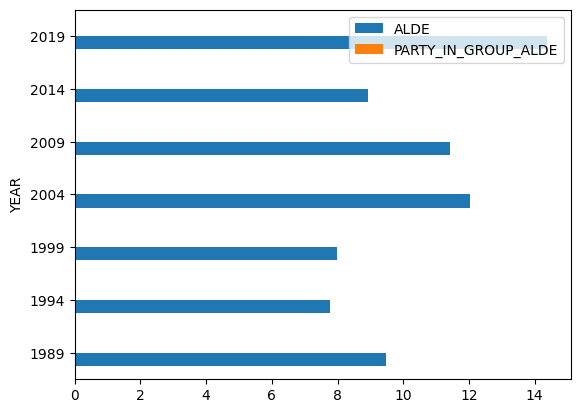

In [84]:
ax=df_ALDE.plot(kind='barh',x='YEAR')
plt.show()

In [85]:
#Για τους Σοσιαλιστές
df_SD = final_df[final_df['LABEL'] == 'S&D']

In [86]:
df_SD = df_SD[['SEATS_PERCENT_EU_G','YEAR','PARTY_IN_GROUP']].copy()
df_SD = df_SD.rename(columns={'SEATS_PERCENT_EU_G':'S&D'})
df_SD = df_SD.rename(columns={'PARTY_IN_GROUP':'PARTY_IN_GROUP_SD'})

In [87]:
#Για τις Συνομοσπονδιακές Ομάδες της Αριστεράς
df_GUEL = final_df[final_df['LABEL'] == 'GUEL']

In [88]:
df_GUEL = df_GUEL[['SEATS_PERCENT_EU_G','YEAR','PARTY_IN_GROUP']].copy()
df_GUEL = df_GUEL.rename(columns={'SEATS_PERCENT_EU_G':'GUEL'})
df_GUEL = df_GUEL.rename(columns={'PARTY_IN_GROUP':'PARTY_IN_GROUP_GUEL'})

In [89]:
#Για την ομάδα των Πράσινων
df_GREEN = final_df[final_df['LABEL'] == 'GREEN']

In [90]:
df_GREEN = df_GREEN[['SEATS_PERCENT_EU_G','YEAR','PARTY_IN_GROUP']].copy()
df_GREEN = df_GREEN.rename(columns={'SEATS_PERCENT_EU_G':'GREEN'})
df_GREEN = df_GREEN.rename(columns={'PARTY_IN_GROUP':'PARTY_IN_GROUP_GREEN'})

In [91]:
#Ενώνουμε όλα τα ξεχωριστά datasets της κάθε πολιτικής ομάδας σε ένα
df_visual2 = pd.merge(df_EPP, df_ALDE, on='YEAR', how='outer')

In [92]:
df_visual2 = pd.merge(df_visual2, df_GREEN, on='YEAR', how='outer')
df_visual2

,EPP,YEAR,PARTY_IN_GROUP_EPP,ALDE,PARTY_IN_GROUP_ALDE,GREEN,PARTY_IN_GROUP_GREEN
0,25.4,1984,8.2,NaN,NaN,NaN,NaN
1,23.4,1989,8.3,9.5,0.0,5.8,0.0
2,27.5,1994,5.8,7.8,0.0,4.1,0.0
3,37.1,1999,3.9,8.0,0.0,7.7,0.0
4,36.6,2004,4.1,12.0,0.0,5.7,0.0
5,36.0,2009,3.0,11.4,0.0,7.5,1.9
6,29.4,2014,2.3,8.9,0.0,6.7,0.0
7,24.2,2019,4.4,14.4,NaN,9.8,NaN


In [93]:
df_visual2 = pd.merge(df_visual2, df_GUEL, on='YEAR', how='outer')

In [94]:
df_visual2 = pd.merge(df_visual2, df_SD, on='YEAR', how='outer')
df_visual2 = df_visual2.drop_duplicates(keep='first')

In [95]:
df_visual2 

,EPP,YEAR,PARTY_IN_GROUP_EPP,ALDE,PARTY_IN_GROUP_ALDE,GREEN,PARTY_IN_GROUP_GREEN,GUEL,PARTY_IN_GROUP_GUEL,S&D,PARTY_IN_GROUP_SD
0,25.4,1984,8.2,NaN,NaN,NaN,NaN,9.4,9.7,29.9,7.7
1,23.4,1989,8.3,9.5,0.0,5.8,0.0,5.4,3.5,34.8,5.0
2,27.5,1994,5.8,7.8,0.0,4.1,0.0,4.9,14.4,34.9,5.0
4,37.1,1999,3.9,8.0,0.0,7.7,0.0,6.7,16.7,28.8,5.0
7,36.6,2004,4.1,12.0,0.0,5.7,0.0,5.6,9.8,27.3,4.0
9,36.0,2009,3.0,11.4,0.0,7.5,1.9,4.8,8.6,25.0,4.4
11,29.4,2014,2.3,8.9,0.0,6.7,0.0,6.9,11.6,25.4,2.1
13,24.2,2019,4.4,14.4,NaN,9.8,NaN,5.5,14.7,20.5,1.3


In [96]:
#οπτικοκοποίηση με τη χρήση matplotlib
#θέλω το τελικό σχεδιάγραμμα να περιλαμβάνει και τα ποσοστά των κομμάτων ώστε να εμφανίζεται
#το πόσο χώρο καταλαμβάνουν στη κάθε πολιτική ομάδα 

Text(0.5, 1.0, 'EPP')

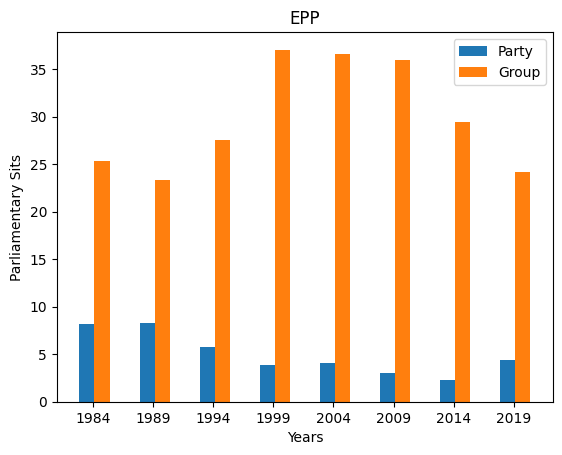

In [97]:
data1=df_visual2['PARTY_IN_GROUP_EPP']
data2=df_visual2['EPP']
    
X = np.arange(len(df_visual2))

    
plt.bar(X, data1.values, width=0.25)
plt.bar(X+0.25, data2.values, width=0.25)
plt.xticks([r + 0.10 for r in range(8)],df_visual2['YEAR'])
plt.xlabel('Years')
plt.ylabel('Parliamentary Sits')
plt.legend(['Party','Group'])
plt.title('EPP')
    

Text(0.5, 1.0, 'ALDE')

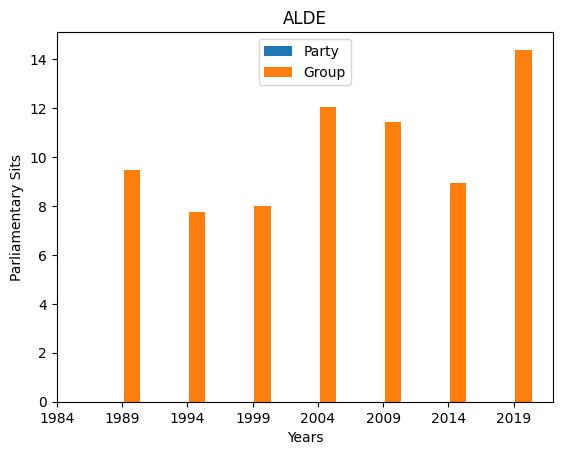

In [98]:
data1=df_visual2['PARTY_IN_GROUP_ALDE']
data2=df_visual2['ALDE']
    
X = np.arange(len(df_visual2))

    
plt.bar(X, data1.values, width=0.25)
plt.bar(X+0.25, data2.values, width=0.25)
plt.xticks([r + 0.10 for r in range(8)],df_visual2['YEAR']) 
plt.xlabel('Years')
plt.ylabel('Parliamentary Sits')
plt.legend(['Party','Group'])
plt.title('ALDE')
    

Text(0.5, 1.0, 'GREEN')

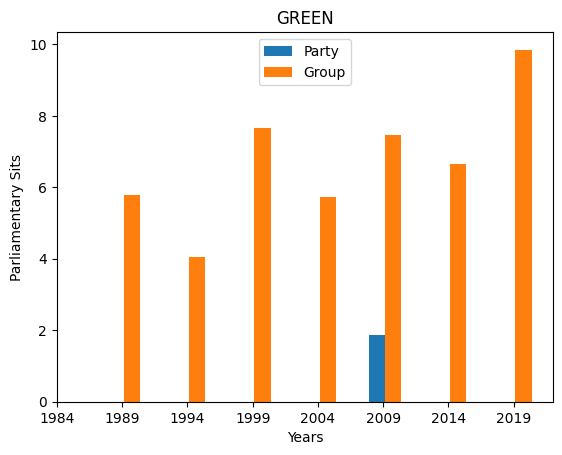

In [99]:
data1=df_visual2['PARTY_IN_GROUP_GREEN']
data2=df_visual2['GREEN']
    
X = np.arange(len(df_visual2))

    
plt.bar(X, data1.values, width=0.25)
plt.bar(X+0.25, data2.values, width=0.25)
plt.xticks([r + 0.10 for r in range(8)],df_visual2['YEAR']) 
plt.xlabel('Years')
plt.ylabel('Parliamentary Sits')
plt.legend(['Party','Group'])
plt.title('GREEN')
    

Text(0.5, 1.0, 'GUEL')

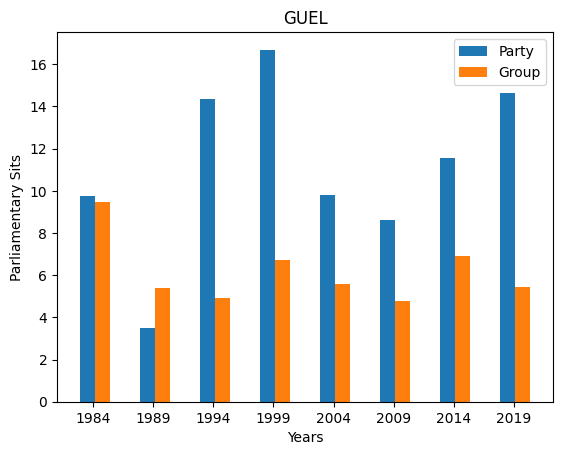

In [100]:
data1=df_visual2['PARTY_IN_GROUP_GUEL']
data2=df_visual2['GUEL']
    
X = np.arange(len(df_visual2))

    
plt.bar(X, data1.values, width=0.25)
plt.bar(X+0.25, data2.values, width=0.25)
plt.xticks([r + 0.10 for r in range(8)],df_visual2['YEAR'])
plt.xlabel('Years')
plt.ylabel('Parliamentary Sits')
plt.legend(['Party','Group'])
plt.title('GUEL')
    

Text(0.5, 1.0, 'S&D')

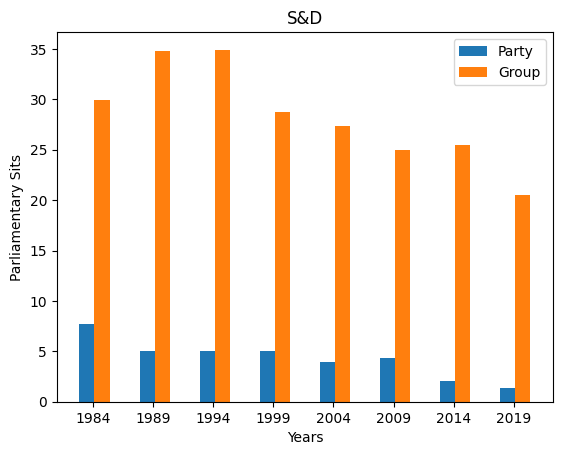

In [101]:
data1=df_visual2['PARTY_IN_GROUP_SD']
data2=df_visual2['S&D']
    
X = np.arange(len(df_visual2))

    
plt.bar(X, data1.values, width=0.25)
plt.bar(X+0.25, data2.values, width=0.25)
plt.xticks([r + 0.10 for r in range(8)],df_visual2['YEAR'])
plt.xlabel('Years')
plt.ylabel('Parliamentary Sits')
plt.legend(['Party','Group'])
plt.title('S&D')
    

In [102]:
df_EPP = visual_df[visual_df['LABEL'] == 'EPP'] 
df_EPP

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR,PARTY_IN_GROUP
1,EL02,9.0,GP0202,9.0,2.1,25.4,EPP,N.D.,1984,8.2
10,EL01,10.0,GP0402,10.0,1.9,23.4,EPP,N.D.,1989,8.3
23,EL02,9.0,GP0602,9.0,1.6,27.5,EPP,N.D.,1994,5.8
34,EL01,9.0,GP0801,9.0,1.4,37.1,EPP,N.D.,1999,3.9
46,EL01,11.0,GP1001,11.0,1.5,36.6,EPP,N.D.,2004,4.1
56,EL01,8.0,GP1201,8.0,1.1,36.0,EPP,N.D.,2009,3.0
67,EL02,5.0,GP1401,5.0,0.7,29.4,EPP,N.D.,2014,2.3
77,EL01,8.0,EPP,8.0,1.1,24.2,EPP,N.D.,2019,4.4


In [103]:
df_EPP.SEATS_PERCENT_EU_G.median()

28.47

In [104]:
df_EPP.SEATS_PERCENT_EU_P.median()

1.47

In [105]:
#για άρθρο 
df_ND = final_df[final_df['ACRONYM'] == 'N.D.'] 
df_ND

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR,PARTY_IN_GROUP
1,EL02,9.0,GP0202,9.0,2.1,25.4,EPP,N.D.,1984,8.2
10,EL01,10.0,GP0402,10.0,1.9,23.4,EPP,N.D.,1989,8.3
23,EL02,9.0,GP0602,9.0,1.6,27.5,EPP,N.D.,1994,5.8
34,EL01,9.0,GP0801,9.0,1.4,37.1,EPP,N.D.,1999,3.9
46,EL01,11.0,GP1001,11.0,1.5,36.6,EPP,N.D.,2004,4.1
56,EL01,8.0,GP1201,8.0,1.1,36.0,EPP,N.D.,2009,3.0
67,EL02,5.0,GP1401,5.0,0.7,29.4,EPP,N.D.,2014,2.3
77,EL01,8.0,EPP,8.0,1.1,24.2,EPP,N.D.,2019,4.4


In [106]:
df_PASOK = final_df[final_df['ACRONYM'] == 'PA.SO.K.'] 
df_PASOK

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR,PARTY_IN_GROUP
0,EL01,10.0,GP0201,10.0,2.3,29.9,S&D,PA.SO.K.,1984,7.7
11,EL02,9.0,GP0401,9.0,1.7,34.8,S&D,PA.SO.K.,1989,5.0
22,EL01,10.0,GP0601,10.0,1.8,34.9,S&D,PA.SO.K.,1994,5.0
35,EL02,9.0,GP0802,9.0,1.4,28.8,S&D,PA.SO.K.,1999,5.0
47,EL02,8.0,GP1002,8.0,1.1,27.3,S&D,PA.SO.K.,2004,4.0
57,EL02,8.0,GP1202,8.0,1.1,25.0,S&D,PA.SO.K.,2009,4.4
70,EL05,2.0,GP1402,4.0,0.5,25.4,S&D,PA.SO.K.,2014,2.1
78,EL02,2.0,SD,2.0,0.3,20.5,S&D,PA.SO.K.,2019,1.3


In [107]:
#Υπολογίζουμε τον μέσο όρο των εδρών του εθνικού κόμματος μέσα στο Ευρωκοινοβούλιο σε ποσοστό
df_PASOK.SEATS_PERCENT_EU_P.median()

1.2650000000000001

In [108]:
#Υπολογίζουμε τον μέσο όρο των εδρών του εθνικού κόμματος μέσα στην πολιτική ομάδα που ανήκει σε ποσοστό
df_PASOK.SEATS_PERCENT_EU_G.median()

28.035

In [109]:
df_ND.SEATS_PERCENT_EU_P.mean()

1.42

In [110]:
df_ND.SEATS_PERCENT_EU_G.mean()

29.945

In [111]:
df_KKE = final_df[final_df['ACRONYM'] == 'K.K.E'] 
df_KKE

,PARTY_ID,SEATS_TOTAL_P,GROUP_ID,SEATS_TOTAL_G,SEATS_PERCENT_EU_P,SEATS_PERCENT_EU_G,LABEL,ACRONYM,YEAR,PARTY_IN_GROUP
2,EL03,4.0,GP0204,4.0,0.9,9.4,GUEL,K.K.E,1984,9.7
24,EL03,2.0,GP0604,4.0,0.7,4.9,GUEL,K.K.E,1994,14.4
36,EL03,3.0,GP0805,7.0,1.1,6.7,GUEL,K.K.E,1999,16.7
48,EL03,3.0,GP1005,4.0,0.6,5.6,GUEL,K.K.E,2004,9.8
59,EL04,2.0,GP1206,3.0,0.4,4.8,GUEL,K.K.E,2009,8.6
71,EL06,2.0,NaN,5.0,0.7,6.9,Μη Εγγεγραμμένοι,K.K.E,2014,9.7
79,EL03,2.0,NaN,4.0,0.5,7.6,Μη Εγγεγραμμένοι,K.K.E,2019,7.0


In [112]:
df_KKE.SEATS_PERCENT_EU_P.mean()

0.7014285714285714

In [113]:
df_KKE.SEATS_PERCENT_EU_P.median()

0.67

In [114]:
#προσπαθειες για οπτικοποίηση
#νεο df με axis 1 τις χρονιες και axis 0 το party
df_KKE = df_KKE[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_KKE= df_KKE.rename(columns={'SEATS_PERCENT_EU_P':'KKE'})

In [115]:
df_PASOK = df_PASOK[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_PASOK = df_PASOK.rename(columns={'SEATS_PERCENT_EU_P':'PASOK'})

In [116]:
df_ND = df_ND[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_ND = df_ND.rename(columns={'SEATS_PERCENT_EU_P':'ND'})

In [117]:
df_SYRIZA = final_df[final_df['ACRONYM'] == 'SY.RIZ.A'] 
df_SYRIZA = df_SYRIZA[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_SYRIZA = df_SYRIZA.rename(columns={'SEATS_PERCENT_EU_P':'SYRIZA'})

In [118]:
df_SYN = final_df[final_df['ACRONYM'] == 'SYN'] 
df_SYN = df_SYN[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_SYN = df_SYN.rename(columns={'SEATS_PERCENT_EU_P':'SYN'})
#Αφαιρούμε τις δύο τιμές του 1989 και τις αντικαθιστούμε με το άθροισμά τους 
df_SYN = df_SYN.reset_index()
df_SYN = df_SYN[['SYN','YEAR']].copy()
df_SYN

,SYN,YEAR
0,0.6,1989
1,0.2,1989
2,0.7,1994
3,1.1,1999
4,0.6,2004


In [119]:
df_SYN.SYN[0]

0.58

In [120]:
df_SYN.replace([0.58], '0.8', inplace=True)

In [121]:
df_SYN = df_SYN.drop(labels=[1], axis=0)
df_SYN.reset_index(0)

,index,SYN,YEAR
0,0,0.8,1989
1,2,0.7,1994
2,3,1.1,1999
3,4,0.6,2004


In [122]:
df_LAOS = final_df[final_df['ACRONYM'] == 'LA.O.S'] 
df_LAOS = df_LAOS[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_LAOS = df_LAOS.rename(columns={'SEATS_PERCENT_EU_P':'LAOS'})

In [123]:
df_XA = final_df[final_df['ACRONYM'] == 'X.A.'] 
df_XA = df_XA[['SEATS_PERCENT_EU_P','YEAR']].copy()
df_XA = df_XA.rename(columns={'SEATS_PERCENT_EU_P':'XA'})

In [124]:
df_visual1 = pd.merge(df_XA, df_ND, on='YEAR', how='outer')
df_visual1 

,XA,YEAR,ND
0,0.7,2014,0.7
1,0.5,2019,1.1
2,NaN,1984,2.1
3,NaN,1989,1.9
4,NaN,1994,1.6
5,NaN,1999,1.4
6,NaN,2004,1.5
7,NaN,2009,1.1


In [125]:
df_visual1=pd.merge(df_visual1,df_PASOK, on='YEAR', how='outer')
df_visual1 

,XA,YEAR,ND,PASOK
0,0.7,2014,0.7,0.5
1,0.5,2019,1.1,0.3
2,NaN,1984,2.1,2.3
3,NaN,1989,1.9,1.7
4,NaN,1994,1.6,1.8
5,NaN,1999,1.4,1.4
6,NaN,2004,1.5,1.1
7,NaN,2009,1.1,1.1


In [126]:
df_visual1=pd.merge(df_visual1,df_KKE, on='YEAR', how='outer')
df_visual1 

,XA,YEAR,ND,PASOK,KKE
0,0.7,2014,0.7,0.5,0.7
1,0.5,2019,1.1,0.3,0.5
2,NaN,1984,2.1,2.3,0.9
3,NaN,1989,1.9,1.7,NaN
4,NaN,1994,1.6,1.8,0.7
5,NaN,1999,1.4,1.4,1.1
6,NaN,2004,1.5,1.1,0.6
7,NaN,2009,1.1,1.1,0.4


In [127]:
df_visual1=pd.merge(df_visual1,df_SYRIZA, on='YEAR', how='outer')
df_visual1 

,XA,YEAR,ND,PASOK,KKE,SYRIZA
0,0.7,2014,0.7,0.5,0.7,0.8
1,0.5,2019,1.1,0.3,0.5,0.8
2,NaN,1984,2.1,2.3,0.9,NaN
3,NaN,1989,1.9,1.7,NaN,NaN
4,NaN,1994,1.6,1.8,0.7,NaN
5,NaN,1999,1.4,1.4,1.1,NaN
6,NaN,2004,1.5,1.1,0.6,NaN
7,NaN,2009,1.1,1.1,0.4,0.4


In [128]:
df_visual1=pd.merge(df_visual1,df_LAOS, on='YEAR', how='outer')
df_visual1 

,XA,YEAR,ND,PASOK,KKE,SYRIZA,LAOS
0,0.7,2014,0.7,0.5,0.7,0.8,NaN
1,0.5,2019,1.1,0.3,0.5,0.8,NaN
2,NaN,1984,2.1,2.3,0.9,NaN,NaN
3,NaN,1989,1.9,1.7,NaN,NaN,NaN
4,NaN,1994,1.6,1.8,0.7,NaN,NaN
5,NaN,1999,1.4,1.4,1.1,NaN,NaN
6,NaN,2004,1.5,1.1,0.6,NaN,0.1
7,NaN,2009,1.1,1.1,0.4,0.4,0.3


In [129]:
df_visual1=pd.merge(df_visual1,df_SYN, on='YEAR', how='outer')
df_visual1 

,XA,YEAR,ND,PASOK,KKE,SYRIZA,LAOS,SYN
0,0.7,2014,0.7,0.5,0.7,0.8,NaN,NaN
1,0.5,2019,1.1,0.3,0.5,0.8,NaN,NaN
2,NaN,1984,2.1,2.3,0.9,NaN,NaN,NaN
3,NaN,1989,1.9,1.7,NaN,NaN,NaN,0.8
4,NaN,1994,1.6,1.8,0.7,NaN,NaN,0.7
5,NaN,1999,1.4,1.4,1.1,NaN,NaN,1.1
6,NaN,2004,1.5,1.1,0.6,NaN,0.1,0.6
7,NaN,2009,1.1,1.1,0.4,0.4,0.3,NaN


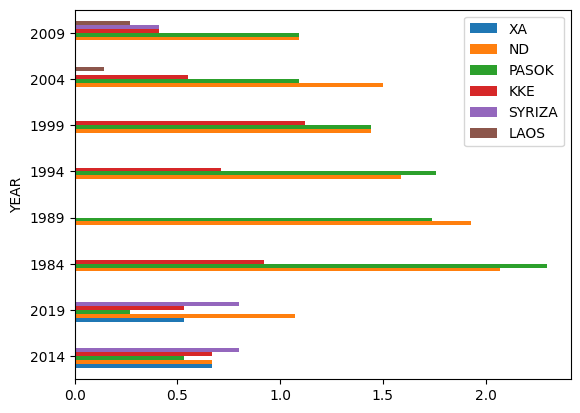

In [130]:
ax=df_visual1.plot(kind='barh',x='YEAR')
plt.show()